### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Tennis']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 14449    Tennis
14450    Tennis
14451    Tennis
14452    Tennis
14453    Tennis
          ...  
15106    Tennis
15107    Tennis
15108    Tennis
15109    Tennis
15110    Tennis
Name: Sport, Length: 662, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 14449    NA
14450    NA
14451    NA
14452    NA
14453    NA
         ..
15106    NA
15107    NA
15108    NA
15109    NA
15110    NA
Name: Medal, Length: 662, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 14449 to 15110
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      662 non-null    int64  
 1   Unnamed: 0_x    662 non-null    int64  
 2   ID              662 non-null    int64  
 3   Name            662 non-null    object 
 4   Sex             662 non-null    object 
 5   Age             662 non-null    float64
 6   Height          662 non-null    float64
 7   Weight          662 non-null    float64
 8   NOC             662 non-null    object 
 9   Games           662 non-null    object 
 10  Year            662 non-null    int64  
 11  Season          662 non-null    object 
 12  City            662 non-null    object 
 13  Sport           662 non-null    object 
 14  Event           662 non-null    object 
 15  Medal           662 non-null    object 
 16  Team            662 non-null    object 
 17  Unnamed: 0_y    662 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (496, 1) (496, 6)
Test Set  : (166, 1) (166, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
14805,27.0,90.0,185.0,5.340000e+11,38125759.0,14006.278537,NA
14682,26.0,77.0,185.0,1.650000e+12,58892514.0,28017.143231,NA
14865,30.0,80.0,185.0,1.240000e+12,46443959.0,26698.843654,Gold
14985,24.0,74.0,180.0,4.731062e+10,10210971.0,4633.312923,NA
14767,25.0,84.0,193.0,4.157453e+10,4439000.0,9365.742468,Bronze
...,...,...,...,...,...,...,...
14789,36.0,78.0,185.0,3.910000e+11,8747358.0,44699.210893,NA
14598,29.0,80.0,188.0,3.829985e+10,7057412.0,5426.897946,NA
14605,25.0,76.0,183.0,2.050000e+11,10324611.0,19855.469615,NA
14952,26.0,75.0,182.0,1.640000e+12,45954106.0,35687.779455,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        611
Bronze     17
Silver     17
Gold       17
Name: Medal, dtype: int64


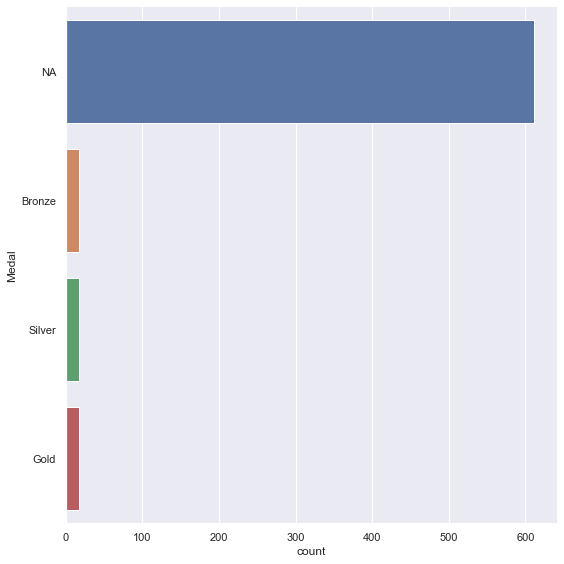

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(496, 6) (496, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1816, 6) (1816, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,27.000000,90.000000,185.000000,5.340000e+11,3.812576e+07,14006.278537,NA
1,26.000000,77.000000,185.000000,1.650000e+12,5.889251e+07,28017.143231,NA
2,30.000000,80.000000,185.000000,1.240000e+12,4.644396e+07,26698.843654,Gold
3,24.000000,74.000000,180.000000,4.731062e+10,1.021097e+07,4633.312923,NA
4,25.000000,84.000000,193.000000,4.157453e+10,4.439000e+06,9365.742468,Bronze
...,...,...,...,...,...,...,...
1811,26.262888,82.458762,190.000000,2.663608e+12,6.405382e+07,41588.170724,Silver
1812,33.321958,79.678042,178.219580,5.140000e+11,9.219637e+06,55750.568054,Silver
1813,26.049650,72.600467,182.600467,2.537199e+12,8.241720e+07,30776.345652,Silver
1814,24.324507,85.649013,187.464901,7.827649e+12,1.872050e+08,41453.748652,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
14844,27.0,84.0,190.0,1.070000e+12,4.292190e+07,24929.001853
14824,24.0,85.0,183.0,2.360000e+11,1.038460e+07,22725.953029
14954,23.0,63.0,166.0,3.710000e+11,1.042114e+07,35600.721879
15025,26.0,80.0,193.0,1.760000e+11,4.559330e+07,3860.216304
14513,34.0,78.0,180.0,2.070000e+12,5.953972e+07,34766.708750
...,...,...,...,...,...,...
14737,32.0,70.0,178.0,3.480000e+12,8.266768e+07,42096.255629
14532,31.0,86.0,182.0,3.620000e+11,4.038239e+07,8964.303722
15092,22.0,72.0,182.0,5.910000e+11,1.440671e+08,4102.256440
14510,32.0,87.0,190.0,1.830000e+12,1.263066e+09,1448.855574


Number of Medal Types : 4
Bronze    454
Gold      454
NA        454
Silver    454
Name: Medal, dtype: int64


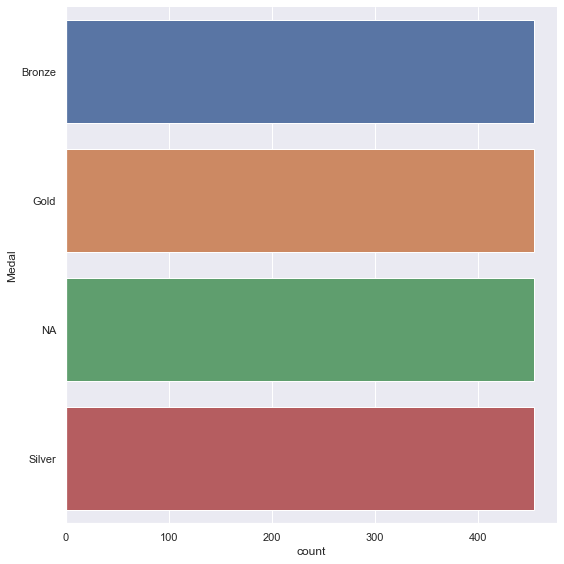

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1362, 1) (1362, 6)
Test Set  : (454, 1) (454, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9882525697503671

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9118942731277533



<AxesSubplot:>

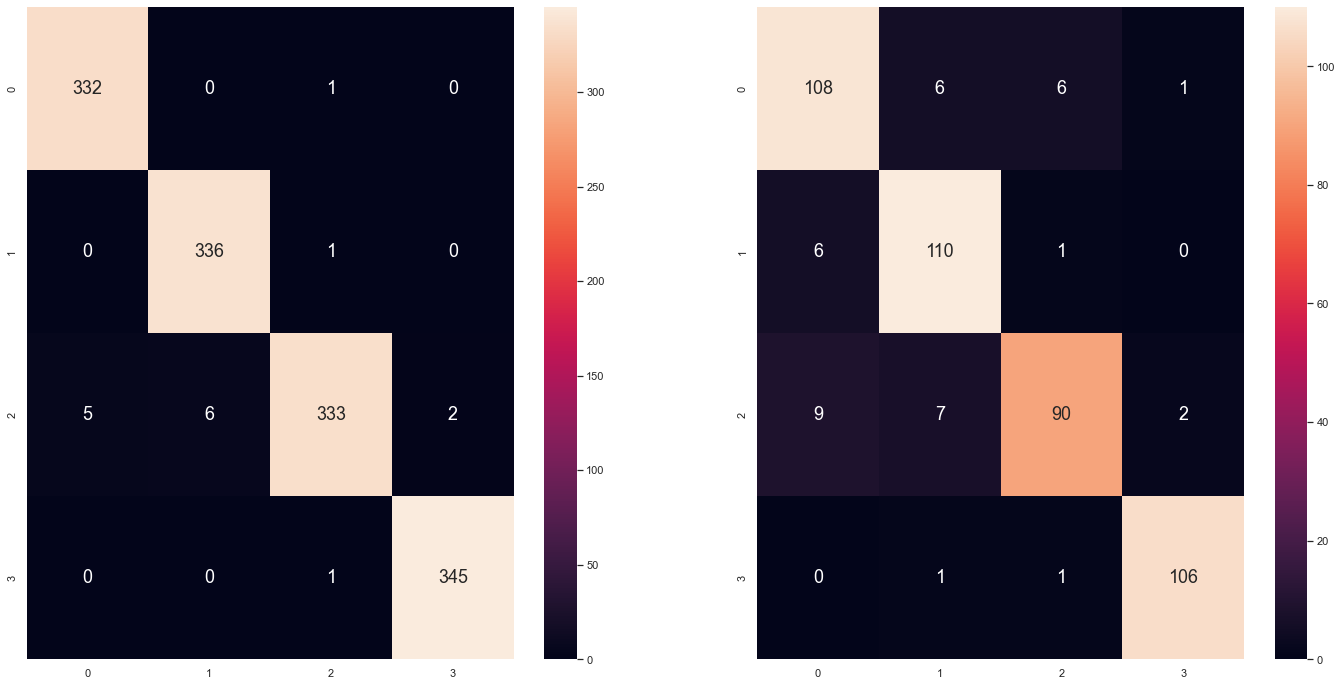

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

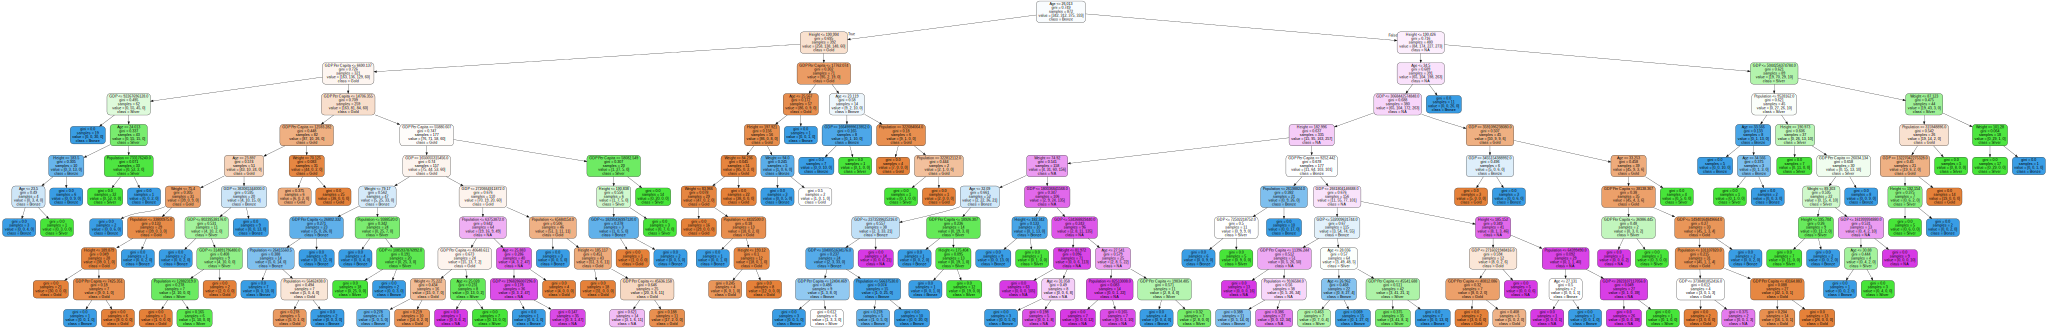

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7710843373493976


### Predictions

<AxesSubplot:>

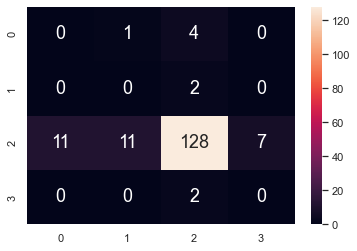

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})